# Data Analysis methods for Amazon Product Data Review

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("./Dataset/all_catagories/Processed_all_datas.csv")

Amazon Customer Reviews (a.k.a. Product Reviews) is one of Amazons iconic products. In a period of over two decades since the first review in 1995, millions of Amazon customers have contributed over a hundred million reviews to express opinions and describe their experiences regarding products on the Amazon.com website. This makes Amazon Customer Reviews a rich source of information for academic researchers in the fields of Natural Language Processing (NLP), Information Retrieval (IR), and Machine Learning (ML), amongst others. Accordingly, we are releasing this data to further research in multiple disciplines related to understanding customer product experiences. Specifically, this dataset was constructed to represent a sample of customer evaluations and opinions, variation in the perception of a product across geographical regions, and promotional intent or bias in reviews.
Over 130+ million customer reviews are available to researchers as part of this release. The data is available in TSV files in the amazon-reviews-pds S3 bucket in AWS US East Region. Each line in the data files corresponds to an individual review (tab delimited, with no quote and escape characters).
Each Dataset contains the following columns:
- marketplace: 2 letter country code of the marketplace where the review was written.
- customer_id: Random identifier that can be used to aggregate reviews written by a single author.
- review_id: The unique ID of the review.
- product_id: The unique Product ID the review pertains to. In the multilingual dataset the reviews for the same product in different countries can be grouped by the same product_id.
- product_parent: Random identifier that can be used to aggregate reviews for the same product.
- product_title: Title of the product.
- product_category: Broad product category that can be used to group reviews (also used to group the dataset into coherent parts).
- star_rating: The 1-5 star rating of the review.
- helpful_votes: Number of helpful votes.
- total_votes: Number of total votes the review received.
- vine: Review was written as part of the Vine program.
- verified_purchase: The review is on a verified purchase.
- review_headline: The title of the review.
- review_body: The review text.
- review_date: The date the review was written.

For this data set, we drop review_body and review_date because it is really hard to analyze these catagories

In [3]:
df

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_date
0,US,51632887,R3B581VNKYCP16,B00HFPOXM4,114966677,Garmin Vivofit Fitness Band,Wireless,5.0,5854.0,6063.0,N,Y,2014-03-12
1,US,49452274,RT0KPKVSQD0HI,B00A17IAO0,979081054,UP by Jawbone Wristband,Wireless,5.0,4856.0,5029.0,N,Y,2012-11-27
2,US,44086587,RYBUAAD9JZ1VW,B001S2RCWI,835787812,Garmin Portable Friction Dashboard Mount,Wireless,5.0,4017.0,4048.0,N,Y,2009-06-14
3,US,49452274,R2Z0F95XGL71C6,B00GOGV314,190508754,"UP24 by Jawbone Wristband, Retail Packaging",Wireless,5.0,3914.0,4022.0,N,N,2013-12-08
4,US,18464808,RZ0J3PVMPU4CJ,B00DGEGJ02,212863722,"Wemo Wi-Fi enabled, Works with Amazon Alexa",Wireless,1.0,3667.0,3894.0,N,Y,2013-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8595,US,49235154,RZBO5U8IYTG1V,0393315703,194483165,The Blind Watchmaker: Why the Evidence of Evol...,Books,5.0,857.0,983.0,N,N,2001-09-11
8596,US,48890006,RPP8P15M3U2JL,0879838167,472643259,Nutrition and Physical Degeneration,Books,5.0,961.0,980.0,N,Y,2004-01-21
8597,US,20953285,R3C1BTS75WHVUQ,088404632X,156656124,Dianetics: The Modern Science of Mental Health,Books,5.0,36.0,980.0,N,N,2004-02-16
8598,US,50823784,R2MXU0D7H4MPX8,0465016901,241968441,The Drama of the Gifted Child: The Search for ...,Books,4.0,950.0,980.0,N,N,2000-11-07


## Basic descriptive statistic with Pandas

In [4]:
print(df[['star_rating', 'helpful_votes', 'total_votes']].describe())

       star_rating  helpful_votes   total_votes
count  8600.000000    8600.000000   8600.000000
mean      3.783140    1100.549767   1184.906395
std       1.565656    1743.862323   1809.567130
min       1.000000       0.000000     46.000000
25%       3.000000     338.000000    379.000000
50%       5.000000     706.000000    766.000000
75%       5.000000    1250.500000   1335.000000
max       5.000000   47524.000000  48362.000000


In [5]:
print(df[['star_rating', 'helpful_votes', 'total_votes']].corr())

               star_rating  helpful_votes  total_votes
star_rating       1.000000       0.075364     0.058364
helpful_votes     0.075364       1.000000     0.997012
total_votes       0.058364       0.997012     1.000000


In [6]:
print(pd.crosstab(df['product_category'], df['verified_purchase']))

verified_purchase           N    Y
product_category                  
Apparel                    77  123
Automotive                 94  106
Baby                      109   91
Beauty                    113   87
Books                     168   32
Camera                    118   82
Digital_Ebook_Purchase     78  122
Digital_Music_Purchase    122   78
Digital_Software          113   87
Digital_Video_Download    116   84
Digital_Video_Games       106   94
Electronics                98  102
Furniture                  32  168
Gift Card                  59  141
Grocery                   107   93
Health & Personal Care     88  112
Home                      103   97
Home Entertainment        127   73
Home Improvement           85  115
Jewelry                    57  143
Kitchen                   117   83
Lawn and Garden            74  126
Luggage                    41  159
Major Appliances          118   82
Mobile_Apps                37  163
Mobile_Electronics         71  129
Music               

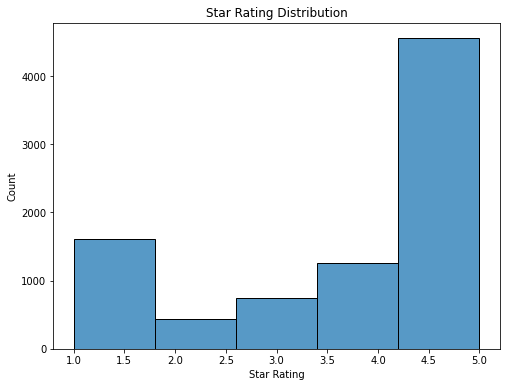

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(x='star_rating', data=df, bins=5)
plt.title('Star Rating Distribution')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

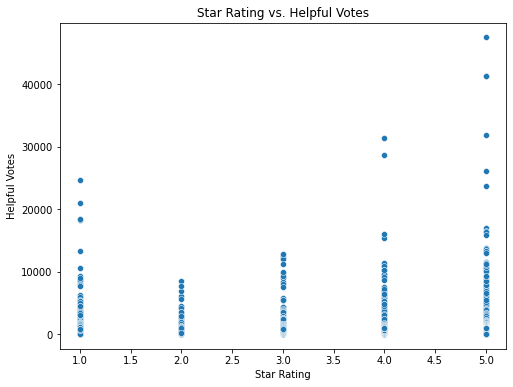

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='star_rating', y='helpful_votes', data=df)
plt.title('Star Rating vs. Helpful Votes')
plt.xlabel('Star Rating')
plt.ylabel('Helpful Votes')
plt.show()

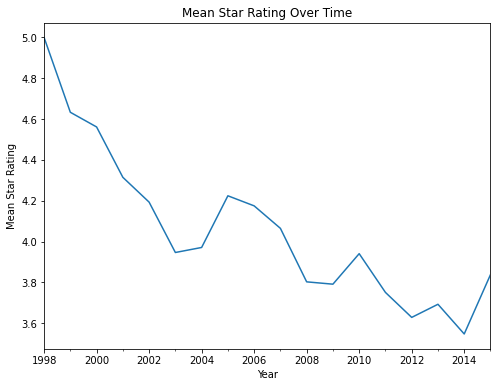

In [9]:
df['review_date'] = pd.to_datetime(df['review_date'])
df.set_index('review_date', inplace=True)
plt.figure(figsize=(8,6))
df['star_rating'].resample('Y').mean().plot()
plt.title('Mean Star Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Star Rating')
plt.show()

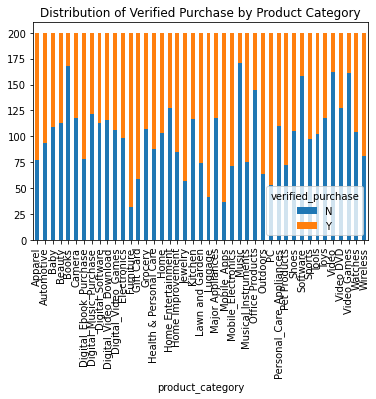

In [10]:
pd.crosstab(df['product_category'], df['verified_purchase']).plot(kind='bar', stacked=True)
plt.title('Distribution of Verified Purchase by Product Category')
plt.show()

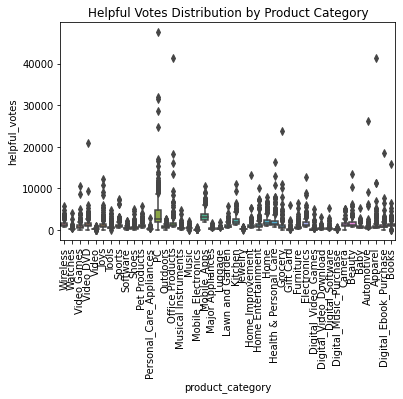

In [11]:
sns.boxplot(x='product_category', y='helpful_votes', data=df)
plt.xticks(rotation=90)
plt.title('Helpful Votes Distribution by Product Category')
plt.show()
